Data Analytics II
1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset
Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the
given dataset.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("Social_Network_Ads.csv")


In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.shape

(400, 5)

In [ ]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Text(0.5, 0, 'Age')

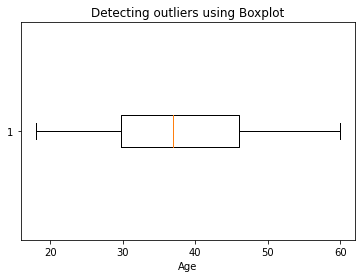

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df["Age"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Age')

Text(0.5, 0, 'Age')

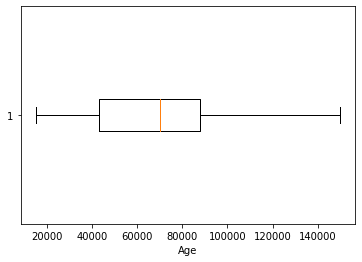

In [ ]:
plt.boxplot(df["EstimatedSalary"], vert=False)
plt.xlabel('Age')

Split data into train and test data

Seperate Purchased (Categorical) data from the Rest (Numerical Data)

In [ ]:
X = df.drop("Purchased", axis=1)
y = df["Purchased"]

In [ ]:
X = X.drop("Purchased", axis=1)

In [ ]:
X,y

(      User ID  Age  EstimatedSalary
 0    15624510   19            19000
 1    15810944   35            20000
 2    15668575   26            43000
 3    15603246   27            57000
 4    15804002   19            76000
 ..        ...  ...              ...
 395  15691863   46            41000
 396  15706071   51            23000
 397  15654296   50            20000
 398  15755018   36            33000
 399  15594041   49            36000
 
 [400 rows x 3 columns], 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=0)

In [ ]:
X_train, X_test

(      User ID  Age  EstimatedSalary
 250  15810075   44            39000
 63   15583681   32           120000
 312  15733964   38            50000
 159  15598840   32           135000
 283  15663249   52            21000
 ..        ...  ...              ...
 323  15619465   48            30000
 192  15779581   29            43000
 117  15591433   36            52000
 47   15776348   27            54000
 172  15794661   26           118000
 
 [300 rows x 3 columns],       User ID  Age  EstimatedSalary
 132  15725660   30            87000
 309  15652400   38            50000
 341  15776844   35            75000
 196  15738448   30            79000
 246  15638003   35            50000
 ..        ...  ...              ...
 146  15750839   27            96000
 135  15578006   23            63000
 390  15807837   48            33000
 264  15600379   48            90000
 364  15654456   42           104000
 
 [100 rows x 3 columns])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std = StandardScaler()

In [ ]:
X_train = std.fit_transform(X_train)

In [ ]:
X_test = std.transform(X_test)

In [ ]:
std.mean_

array([1.56917163e+07, 3.81266667e+01, 6.95833333e+04])

In [ ]:
X_train

array([[ 1.67009484e+00,  5.81649437e-01, -8.86706990e-01],
       [-1.52442817e+00, -6.06737608e-01,  1.46173768e+00],
       [ 5.96133781e-01, -1.25440855e-02, -5.67782405e-01],
       [-1.31052773e+00, -6.06737608e-01,  1.89663484e+00],
       [-4.01687250e-01,  1.37390747e+00, -1.40858358e+00],
       [-1.46235626e+00,  1.47293972e+00,  9.97847375e-01],
       [-3.29215938e-01,  8.64881682e-02, -7.99727558e-01],
       [ 4.24988037e-01, -1.25440855e-02, -2.48857820e-01],
       [-1.02483329e+00, -2.10608593e-01, -5.67782405e-01],
       [ 4.80851340e-01, -2.10608593e-01, -1.90871532e-01],
       [ 2.61617156e-01, -3.09640847e-01, -1.29261101e+00],
       [-1.33320451e-01, -3.09640847e-01, -5.67782405e-01],
       [-2.56490638e-01,  3.83584929e-01,  9.90599089e-02],
       [ 6.35586622e-01,  8.78746198e-01, -5.96775549e-01],
       [ 1.63411318e+00,  2.06713324e+00, -1.17663843e+00],
       [-7.85858577e-01,  1.07681071e+00, -1.32885244e-01],
       [ 1.74291892e+00,  6.80681690e-01

Training the model using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
pred = model.predict(X_test)

In [ ]:
score = accuracy_score(y_test, pred)

In [ ]:
print("Model: Logistic Regression")
print("===========================")
print("Accuracy Score: {:0.2f}".format(score))
print("===========================")
print("Precision Score: {:0.2f}".format(precision_score(y_test, pred)))
print("===========================")
print("Recall Score: {:0.2f}".format(recall_score(y_test, pred)))

Model: Logistic Regression
Accuracy Score: 0.90
Precision Score: 0.92
Recall Score: 0.75


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_curve, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test, pred)

In [ ]:
tn, fp, fn, tp = cm.ravel()

In [ ]:
tn, fp, fn, tp

(66, 2, 8, 24)

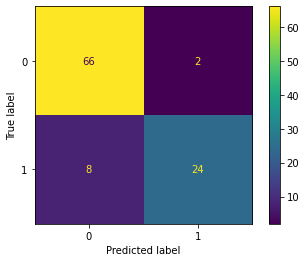

In [ ]:
cm_display = ConfusionMatrixDisplay(cm).plot()

## Diabetes Dataset

In [ ]:
dbdf = pd.read_csv("diabetes.csv")

In [ ]:
dbdf.shape

(768, 9)

In [ ]:
dbdf.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
dbdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:

dbdf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:

dbdf.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x7f74586f0dd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f74587c1bd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f745871f5d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f745873ced0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f74586d6a10>,
  <matplotlib.lines.Line2D at 0x7f74586d64d0>]}

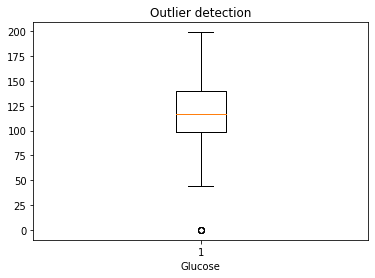

In [ ]:
import matplotlib.pyplot as plt
plt.title("Outlier detection")
plt.xlabel("Glucose")
plt.boxplot(dbdf["Glucose"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f74585e5a10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7458593bd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7458599c10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7458599690>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7458593150>,
  <matplotlib.lines.Line2D at 0x7f7458593690>]}

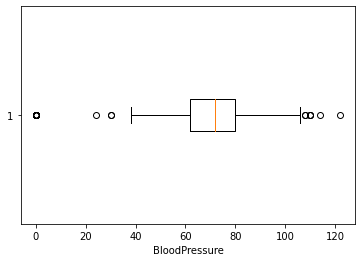

In [ ]:
plt.xlabel("BloodPressure")
plt.boxplot(dbdf["BloodPressure"], vert=False)

{'boxes': [<matplotlib.lines.Line2D at 0x7f745854f850>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7458587950>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f745850f990>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f745850f410>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7458581e90>,
  <matplotlib.lines.Line2D at 0x7f7458587410>]}

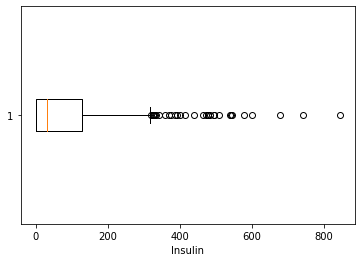

In [ ]:
plt.xlabel("Insulin")
plt.boxplot(dbdf["Insulin"], vert=False)

In [ ]:
inputdata = dbdf.drop("Outcome", axis = 1)
outcomes = dbdf["Outcome"]

In [ ]:
inputdata_train, inputdata_test, outcomes_train, outcomes_test = train_test_split(inputdata, outcomes, test_size=0.25, random_state=0)

In [ ]:
inputdata_train, inputdata_test, outcomes_train, outcomes_test

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 762            9       89             62              0        0  22.5   
 127            1      118             58             36       94  33.3   
 564            0       91             80              0        0  32.4   
 375           12      140             82             43      325  39.2   
 663            9      145             80             46      130  37.9   
 ..           ...      ...            ...            ...      ...   ...   
 763           10      101             76             48      180  32.9   
 192            7      159             66              0        0  30.4   
 629            4       94             65             22        0  24.7   
 559           11       85             74              0        0  30.1   
 684            5      136             82              0        0   0.0   
 
      DiabetesPedigreeFunction  Age  
 762                     0.142   33  
 127                  

In [ ]:
std_scalar = StandardScaler()

In [ ]:
inputdata_train = std.fit_transform(inputdata_train)
inputdata_test = std.transform(inputdata_test)

In [ ]:
diabetes_model = LogisticRegression()

In [ ]:
diabetes_model.fit(inputdata_train, outcomes_train)

LogisticRegression()

In [ ]:
db_pred = diabetes_model.predict(inputdata_test)
db_score = accuracy_score(outcomes_test, db_pred)
print(db_score)

0.8020833333333334
